Here,  I am using data from a power plant that generates electricity. Source: UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#

I will generate learning curves while trying to predict the electrical energy output from the powerplant.
I will brainstorm and experiment with different machine learning models and techniques as needed to reduce bias/variance. 

In [31]:
# Importing and exploring data

import pandas as pd
import numpy as np

electricity = pd.read_excel('Folds5x2_pp.xlsx')
electricity = electricity.dropna(axis=0)
print(electricity.shape)
print(electricity.info())
print(electricity.head())

(9568, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 448.5 KB
None
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [32]:
# Sizing data and generating learning curves

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes = [1, 100, 500, 2000, 5000, 7654]
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(), 
                                                              X=electricity[features], y=electricity[target], 
                                                              train_sizes = train_sizes, 
                                                              cv=5,  scoring='neg_mean_squared_error')

In [33]:
print('Training scores:\n\n', train_scores)
print('\n', '-' *60)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [34]:
'''
 For each training set size, the function generated a row of error scores
 This is because, the learning function had a parameter cv=5. So it ran5-fold cross validation in the background
 and generated 5 splits. For each of the split, the Linear Regressor estimator is trained.
 To plot the learning curve, I need just one error scoreper each training set size
 So I am calculating the mean error score
'''
train_scores_mean = -1 * train_scores.mean(axis=1)
validation_scores_mean = -1 * validation_scores.mean(axis=1)

In [35]:
print("Mean of Training Scores \n\n", pd.Series(train_scores_mean, index= train_sizes))
print('\n', '-'*25)
print("Mean of Validation Scores \n\n", pd.Series(validation_scores_mean, index= train_sizes))

Mean of Training Scores 

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 -------------------------
Mean of Validation Scores 

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


(0, 40)

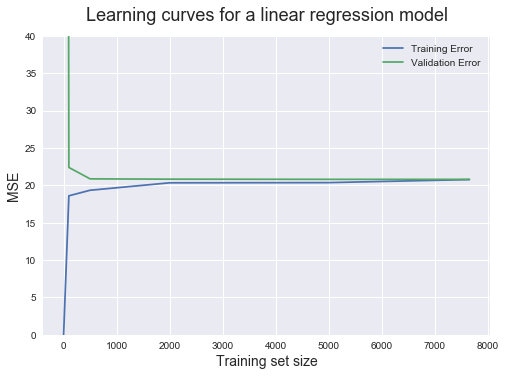

In [37]:
'''
Because I didnot use the shuffle parameter to randomize the data set, the values are bit identical
for various training set sizes. I would like to continue with those values and see
'''

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean,label= 'Training Error')
plt.plot(train_sizes, validation_scores_mean, label= 'Validation Error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,40)



The above plot looks decent. 
The validation error is initially very high at 423.4. But we I can ignore this because at that point, the curve is
based on only one data point. This is natural. As the training set increases, the validation drops which is good.
But the training error is also increase at high rate. I can assume that even after adding more data, 
the curves would not change much as they are already converging.
Here both training error and validation error are high (20 represents 20MW power which is high)
The training error signifies that the model did not fit the data well. Its too simplistic. 
Therefore, this is a high bias model

So I am planning to use ensemble model - Random Forest below



(0, 40)

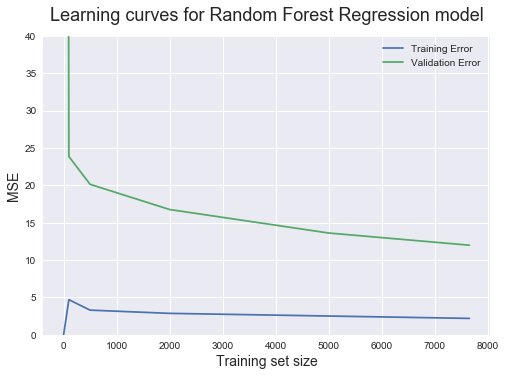

In [41]:


from sklearn.ensemble import RandomForestRegressor

train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestRegressor(),
                                                              X=electricity[features], y=electricity[target], cv=5, 
                                                              scoring= 'neg_mean_squared_error',
                                                              train_sizes = train_sizes)
train_scores_mean = -1 * train_scores.mean(axis = 1)
validation_scores_mean = -1 * validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for Random Forest Regression model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,40)


The above plot looks better than the previous plot, The validation error is lower -- 13 compared to 20
Training error is very low while validation error is significant. This implies overfitting. 
The model performs well on training data but performs poorly on validation data.
May be RandomForest is too complicated for this data set. On the other hand, the validation error didnt converge yet.
So if I have more data, I can better evaluate the overall validation error
I can try increasing the regularization of the current model by using max_leaf_nodes paramater


(0, 40)

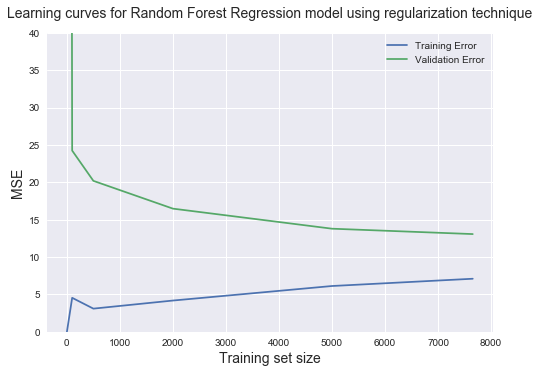

In [43]:


train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestRegressor(max_leaf_nodes=350),
                                                              X=electricity[features], y=electricity[target], cv=5, 
                                                              scoring= 'neg_mean_squared_error',
                                                              train_sizes = train_sizes)
train_scores_mean = -1 * train_scores.mean(axis = 1)
validation_scores_mean = -1 * validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for Random Forest Regression model using regularization technique', fontsize=14, y=1.03)
plt.legend()
plt.ylim(0,40)

'''
Now the training error increased. The gap between the curves is narrow.
Therefore less variance. The bias has increased a bit which is good.
Now the model is more accurate. 
However, if I can get more data, I can better understand the behavior of validation error. 
Also more features for existing data and optimizing them an be useful
'''